# IMPORT

In [149]:
import os
from os import path
import glob
import shutil
from astropy.io import ascii, fits
import numpy as np
import pandas as pd
import seaborn as sns
from astropy.io import fits

# Define Pointing Names

In [96]:
DIR = '/raid2/dxb/xmm/analysis/COSMOS/sicong'
names = [name for name in os.listdir(DIR) if '0' in name and len(name) == 10]
bads = ['0203361601', '0203362001', '0203362301', '0203362501', '0302352001', '0302352201', '0302352301', '0302352401']
names.sort()

## remove bad pointing 0302352401

In [97]:
for bad in bad_names:
    if bad in names:
        names.remove(bad)

In [98]:
print(names, len(names))

['0203360101', '0203360201', '0203360301', '0203360401', '0203360501', '0203360601', '0203360701', '0203360801', '0203360901', '0203361001', '0203361101', '0203361201', '0203361301', '0203361401', '0203361501', '0203361701', '0203361801', '0203361901', '0203362101', '0203362201', '0203362401', '0302350101', '0302350201', '0302350301', '0302350401', '0302350501', '0302350601', '0302350701', '0302350801', '0302350901', '0302351001', '0302351101', '0302351201', '0302351301', '0302351401', '0302351501', '0302351601', '0302351701', '0302351801', '0302351901', '0302352501', '0302353001', '0302353101', '0302353201', '0302353301', '0302353401', '0501170101', '0501170201'] 48


In [119]:
bad_dict = {0: [], 1: ['0203362501'], 2: [], 3: [], 4: ['0302352301', '0203362301'], 5: [], 6: [], 7: ['0203362201'], 8: [], 9: [], 10: [], 11: [], 12: ['0203362501'], 13: ['0203362301'], 14: ['0203362301'], 15: ['0203362201', '0203362301'], 16: ['0203362201'], 17: ['0203362201'], 18: [], 19: [], 20: ['0203362001', '0203362501', '0302352001', '0501170101'], 21: [], 22: ['0203362501', '0203362001'], 23: ['0203362301'], 24: ['0203362301'], 25: ['0203362301', '0203362201', '0203361801'], 26: ['0203362201', '0203361701', '0302351701', '0302352201'], 27: ['0203361601', '0203362201'], 28: ['0203361601'], 29: ['0302351601'], 30: [], 31: ['0203362501', '0203362001', '0203361501'], 32: ['0203362501', '0203362001'], 33: [], 34: ['0203362301'], 35: ['0203362301'], 36: ['0203361601'], 37: ['0203361601', '0302351601', '0302351701', '0203361701'], 38: ['0203361101', '0203361601'], 39: ['0203361601'], 40: ['0203362001'], 41: ['0203362001'], 42: ['0203361501', '0302351501'], 43: ['0203361401', '0302353401', '0203361301', '0302351401'], 44: [], 45: [], 46: ['0203361701'], 47: ['0203361601', '0203361201', '0302351201', '0203361101'], 48: ['0203361601'], 49: [], 50: [], 51: [], 52: ['0203361501'], 53: [], 54: ['0203361401'], 55: [], 56: ['0203360601'], 57: ['0203360701', '0203361201'], 58: [], 59: ['0203361101'], 60: [], 61: [], 62: [], 63: ['0302350401'], 64: ['0203360801', '0203360901'], 65: ['0203360701'], 66: ['0302350701', '0203360701', '0203360201', '0302350201'], 67: ['0203361101', '0203360701', '0302350101', '0203360101'], 68: ['0302350101'], 69: [], 70: [], 71: ['0302350501'], 72: ['0302350401'], 73: ['0302350401', '0302350901', '0203360401', '0203360901', '0302353001'], 74: ['0302350401', '0302350301', '0203360401'], 75: [], 76: ['0302350301'], 77: ['0302350101'], 78: ['0302350101', '0203360101'], 79: ['0302350101'], 80: [], 81: [], 82: ['0302350401'], 83: ['0302350401'], 84: ['0302350401'], 85: ['0302350301'], 86: ['0302353101'], 87: ['0302350101', '0203360101'], 88: ['0302350101'], 89: ['0302350101'], 90: [], 91: [], 92: [], 93: [], 94: [], 95: ['0302350301', '0302350201'], 96: [], 97: [], 98: [], 99: []}
bad_names = []
for i in bad_dict.values():
    bad_names += i
bad_names = list(set(bad_names+['0203361601', '0203362001', '0203362301', '0203362501', '0302352001', '0302352201', '0302352301', '0302352401']))
print(bad_names,len(bad_names))

['0302352401', '0302351201', '0302350501', '0302350101', '0302351401', '0203360201', '0203361301', '0302350301', '0203361801', '0302353401', '0203360101', '0302351601', '0203361201', '0203362301', '0302350201', '0302353101', '0302353001', '0203361401', '0203361601', '0203360601', '0302352301', '0203360701', '0203362001', '0203361101', '0302350901', '0203361501', '0302351701', '0203362501', '0302351501', '0302352201', '0302352001', '0203360401', '0302350401', '0203360901', '0302350701', '0203360801', '0203361701', '0501170101', '0203362201'] 39


# Copy files

In [9]:
src = '/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/'
DIR = '/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase3/'
for name in names:
    shutil.copy2(path.join(src,f'{name}-pnS005-obj-os-full.pi'),DIR)
    shutil.copy2(path.join(src,f'{name}-pnS005-back-full.pi'),DIR)
    shutil.copy2(path.join(src,f'{name}-pnS005-full.arf'),DIR)
    shutil.copy2(path.join(src,f'{name}-pnS005-full.rmf'),DIR)

In [45]:
for name in names:
    src = f'/raid2/dxb/xmm/analysis/COSMOS/sicong/{name}/analysis/pnS005-back-im-sky-400-7200-full.fits'
    fout = f'/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase3/{name}-pnS005-back-im-sky-400-7200-full.fits'
    shutil.copy2(src,fout)

## change file name (if neccessary)

In [93]:
%cd '/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase3/'
files = glob.glob('first*')
for file in files:
    os.rename(file,'{}-old.{}'.format(file.split('.')[0],file.split('.')[1]))

/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase3


In [94]:
files = glob.glob('final*')
for file in files:
    os.rename(file,'{}-old.{}'.format(file.split('.')[0],file.split('.')[1]))

# Combine

## spectra

In [100]:
for i in range(0,40,10):
    print('\nmathpha expr="',end='')
    for k in range(9): 
        print(f"'{names[i+k]}-pnS005-obj-os-full.pi'+",end='')
    print(f"'{names[i+9]}-pnS005-obj-os-full.pi'",end='" ')
    print(f"units='c' outfil='first{i//10}.pi' exposure='calc' areascal='%' ncomments=0 properr=yes")
    
print('\nmathpha expr="',end='')
for i in range(40,47):
    print(f"'{names[i]}-pnS005-obj-os-full.pi'+",end='')
print(f"'{names[47]}-pnS005-obj-os-full.pi'",end='" ')
print("units='c' outfil='first4.pi' exposure='calc' areascal='%' ncomments=0 properr=yes")

print('\nmathpha expr="',end='')
for i in range(0,4):
    print(f"'first{i}.pi'+",end='')
print(f"'first4.pi'",end='" ')
print("units='c' outfil='final.pi' exposure='calc' areascal='%' ncomments=0 properr=yes")


mathpha expr="'0203360101-pnS005-obj-os-full.pi'+'0203360201-pnS005-obj-os-full.pi'+'0203360301-pnS005-obj-os-full.pi'+'0203360401-pnS005-obj-os-full.pi'+'0203360501-pnS005-obj-os-full.pi'+'0203360601-pnS005-obj-os-full.pi'+'0203360701-pnS005-obj-os-full.pi'+'0203360801-pnS005-obj-os-full.pi'+'0203360901-pnS005-obj-os-full.pi'+'0203361001-pnS005-obj-os-full.pi'" units='c' outfil='first0.pi' exposure='calc' areascal='%' ncomments=0 properr=yes

mathpha expr="'0203361101-pnS005-obj-os-full.pi'+'0203361201-pnS005-obj-os-full.pi'+'0203361301-pnS005-obj-os-full.pi'+'0203361401-pnS005-obj-os-full.pi'+'0203361501-pnS005-obj-os-full.pi'+'0203361701-pnS005-obj-os-full.pi'+'0203361801-pnS005-obj-os-full.pi'+'0203361901-pnS005-obj-os-full.pi'+'0203362101-pnS005-obj-os-full.pi'+'0203362201-pnS005-obj-os-full.pi'" units='c' outfil='first1.pi' exposure='calc' areascal='%' ncomments=0 properr=yes

mathpha expr="'0203362401-pnS005-obj-os-full.pi'+'0302350101-pnS005-obj-os-full.pi'+'0302350201-pnS005-

## background

In [101]:
for i in range(0,40,10):
    print('\nmathpha expr="',end='')
    for k in range(9): 
        print(f"'{names[i+k]}-pnS005-back-full.pi'+",end='')
    print(f"'{names[i+9]}-pnS005-back-full.pi'",end='" ')
    print(f"units='c' outfil='firstback{i//10}.pi' exposure='calc' areascal='%' ncomments=0 properr=yes")
    
print('\nmathpha expr="',end='')
for i in range(40,47):
    print(f"'{names[i]}-pnS005-back-full.pi'+",end='')
print(f"'{names[47]}-pnS005-back-full.pi'",end='" ')
print("units='c' outfil='firstback4.pi' exposure='calc' areascal='%' ncomments=0 properr=yes")

print('\nmathpha expr="',end='')
for i in range(0,4):
    print(f"'firstback{i}.pi'+",end='')
print(f"'first4.pi'",end='" ')
print("units='c' outfil='finalback.pi' exposure='calc' areascal='%' ncomments=0 properr=yes")


mathpha expr="'0203360101-pnS005-back-full.pi'+'0203360201-pnS005-back-full.pi'+'0203360301-pnS005-back-full.pi'+'0203360401-pnS005-back-full.pi'+'0203360501-pnS005-back-full.pi'+'0203360601-pnS005-back-full.pi'+'0203360701-pnS005-back-full.pi'+'0203360801-pnS005-back-full.pi'+'0203360901-pnS005-back-full.pi'+'0203361001-pnS005-back-full.pi'" units='c' outfil='firstback0.pi' exposure='calc' areascal='%' ncomments=0 properr=yes

mathpha expr="'0203361101-pnS005-back-full.pi'+'0203361201-pnS005-back-full.pi'+'0203361301-pnS005-back-full.pi'+'0203361401-pnS005-back-full.pi'+'0203361501-pnS005-back-full.pi'+'0203361701-pnS005-back-full.pi'+'0203361801-pnS005-back-full.pi'+'0203361901-pnS005-back-full.pi'+'0203362101-pnS005-back-full.pi'+'0203362201-pnS005-back-full.pi'" units='c' outfil='firstback1.pi' exposure='calc' areascal='%' ncomments=0 properr=yes

mathpha expr="'0203362401-pnS005-back-full.pi'+'0302350101-pnS005-back-full.pi'+'0302350201-pnS005-back-full.pi'+'0302350301-pnS005-bac

## arf

In [103]:
for i in range(0,40,10):
    print('\naddarf',end=' ')
    for k in range(9): 
        print(f"{names[i+k]}-pnS005-full.arf,",end='')
    print(f"{names[i+9]}-pnS005-full.arf",end=' ')
    print('0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1',end=' ')
    print(f"first{i//10}.arf")
    
print('\naddarf',end=' ')
for i in range(40,47):
    print(f"{names[i]}-pnS005-full.arf,",end='')
print(f"{names[47]}-pnS005-full.arf",end=' ')
#print('0.2,0.2,0.2,0.2,0.2',end=' ')
print('0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125',end=' ')
print("first4.arf")

print('\naddarf',end=' ')
for i in range(0,4):
    print(f"first{i}.arf,",end='')
print(f"first4.arf",end=' ')
#print('0.16666666666666666,0.16666666666666666,0.16666666666666666,0.16666666666666666,0.16666666666666666,0.16666666666666666',end=' ')
print('0.2,0.2,0.2,0.2,0.2',end=' ')
print("final.arf")


addarf 0203360101-pnS005-full.arf,0203360201-pnS005-full.arf,0203360301-pnS005-full.arf,0203360401-pnS005-full.arf,0203360501-pnS005-full.arf,0203360601-pnS005-full.arf,0203360701-pnS005-full.arf,0203360801-pnS005-full.arf,0203360901-pnS005-full.arf,0203361001-pnS005-full.arf 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1 first0.arf

addarf 0203361101-pnS005-full.arf,0203361201-pnS005-full.arf,0203361301-pnS005-full.arf,0203361401-pnS005-full.arf,0203361501-pnS005-full.arf,0203361701-pnS005-full.arf,0203361801-pnS005-full.arf,0203361901-pnS005-full.arf,0203362101-pnS005-full.arf,0203362201-pnS005-full.arf 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1 first1.arf

addarf 0203362401-pnS005-full.arf,0302350101-pnS005-full.arf,0302350201-pnS005-full.arf,0302350301-pnS005-full.arf,0302350401-pnS005-full.arf,0302350501-pnS005-full.arf,0302350601-pnS005-full.arf,0302350701-pnS005-full.arf,0302350801-pnS005-full.arf,0302350901-pnS005-full.arf 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1 first2.arf

addarf 03023

## rmf

In [104]:
for i in range(0,40,10):
    print('\naddrmf',end=' ')
    for k in range(9): 
        print(f"{names[i+k]}-pnS005-full.rmf,",end='')
    print(f"{names[i+9]}-pnS005-full.rmf",end=' ')
    print('0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1',end=' ')
    print(f"first{i//10}.rmf")
    
print('\naddrmf',end=' ')
for i in range(40,47):
    print(f"{names[i]}-pnS005-full.rmf,",end='')
print(f"{names[47]}-pnS005-full.rmf",end=' ')
#print('0.2,0.2,0.2,0.2,0.2',end=' ')
print('0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125',end=' ')
print("first4.rmf")

print('\naddrmf',end=' ')
for i in range(0,4):
    print(f"first{i}.rmf,",end='')
print(f"first4.rmf",end=' ')
#print('0.16666666666666666,0.16666666666666666,0.16666666666666666,0.16666666666666666,0.16666666666666666,0.16666666666666666',end=' ')
print('0.2,0.2,0.2,0.2,0.2',end=' ')
print("final.rmf")


addrmf 0203360101-pnS005-full.rmf,0203360201-pnS005-full.rmf,0203360301-pnS005-full.rmf,0203360401-pnS005-full.rmf,0203360501-pnS005-full.rmf,0203360601-pnS005-full.rmf,0203360701-pnS005-full.rmf,0203360801-pnS005-full.rmf,0203360901-pnS005-full.rmf,0203361001-pnS005-full.rmf 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1 first0.rmf

addrmf 0203361101-pnS005-full.rmf,0203361201-pnS005-full.rmf,0203361301-pnS005-full.rmf,0203361401-pnS005-full.rmf,0203361501-pnS005-full.rmf,0203361701-pnS005-full.rmf,0203361801-pnS005-full.rmf,0203361901-pnS005-full.rmf,0203362101-pnS005-full.rmf,0203362201-pnS005-full.rmf 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1 first1.rmf

addrmf 0203362401-pnS005-full.rmf,0302350101-pnS005-full.rmf,0302350201-pnS005-full.rmf,0302350301-pnS005-full.rmf,0302350401-pnS005-full.rmf,0302350501-pnS005-full.rmf,0302350601-pnS005-full.rmf,0302350701-pnS005-full.rmf,0302350801-pnS005-full.rmf,0302350901-pnS005-full.rmf 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1 first2.rmf

addrmf 03023

## grppha

In [29]:
print('grppha infile="final.pi" \
outfile="final-grp.pi" comm="group min 25&chkey \
RESPFILE final.rmf&chkey \
ANCRFILE final.arf&chkey BACKFILE finalback.pi&exit"')

grppha infile="final.pi" outfile="final-grp.pi" comm="group min 25&chkey RESPFILE final.rmf&chkey ANCRFILE final.arf&chkey BACKFILE finalback.pi&exit"


## backscale

In [31]:
print("""
da final-grp.pi

ignore 1:0.-10. 14.-**

tclout rate 1
scan $xspec_tclout "%f" temp

backgrnd none 
tclout rate 1 
scan $xspec_tclout "%f" sr

backgrnd finalback.pi

tclout backscal 1 s
scan $xspec_tclout "%f" sb
tclout backscal 1 b
scan $xspec_tclout "%f" bbo

set br [expr ($sr-$temp)*($bbo/$sb)]
set bb [expr $br*$sb/$sr]

grppha infile="finalback.pi" outfile="finalback-new.pi" comm="CHKEY BACKSCAL $bb & exit"
""")


da final-grp.pi

ignore 1:0.-10. 14.-**

tclout rate 1
scan $xspec_tclout "%f" temp

backgrnd none 
tclout rate 1 
scan $xspec_tclout "%f" sr

backgrnd finalback.pi

tclout backscal 1 s
scan $xspec_tclout "%f" sb
tclout backscal 1 b
scan $xspec_tclout "%f" bbo

set br [expr ($sr-$temp)*($bbo/$sb)]
set bb [expr $br*$sb/$sr]

grppha infile="finalback.pi" outfile="finalback-new.pi" comm="CHKEY BACKSCAL $bb & exit"



In [36]:
print("mv finalback.pi finalbak-old.pi")
print("mv finalback-new.pi finalback.pi")

mv finalback.pi finalbak-old.pi
mv finalback-new.pi finalback.pi


# Fit

## read LHB temperature and EM

In [39]:
par_file='/raid2/dxb/xmm/analysis/COSMOS/sicong/rosat_maps/lhb_par_phase1.csv'
df=ascii.read(par_file,format='csv')
temps=np.array([df[i]['T'] for i in range(100)])
ems=np.array([df[i]['EM'] for i in range(100)])

In [40]:
temperature = np.sum(temps)/100
em = np.sum(ems)/100

## get solid angle of the whole field

### stack pnS005-back-im-sky-400-7200-full.fits

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa

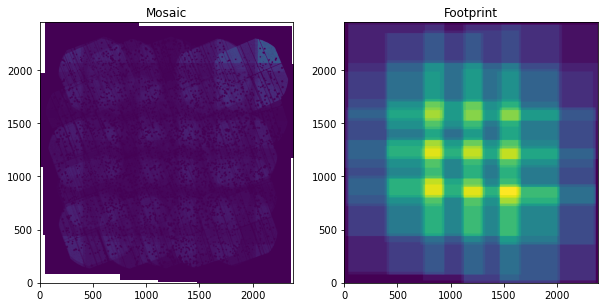

In [73]:
%run /raid2/dxb/xmm/analysis/COSMOS/sicong/scripts/mosaic.py

### get solid angle

In [51]:
def pixel_counter(image_file):
    """
    This function count all the nonzero pixels in an image file
    """
    with fits.open(image_file) as hdu:
        data = hdu[0].data
        x = np.count_nonzero(data)
    return x

In [56]:
def pixel_to_sr(pixels):
    """
    This function convert pixels to solid angles
    """
#     with fits.open(image_file) as hdu:
#         header = hdu[0].header
#         size = float(header['CDELT2'])
    size = 6.94444444E-04
    deg2 = pixels*size**2
    factor = 3282.8
    sr = deg2 / factor
    return sr

In [75]:
#image_file = '/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase3/stacked-pnS005-back-im-sky-400-7200-full.fits'
image_file = '/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase3/mosaic_int.fits'
x = pixel_counter(image_file)
sr = pixel_to_sr(x)
x,sr

(4003538, 0.0005881316420821997)

## get LHB parameters

In [76]:
norm = 2451*em*sr
print('temperature:',temperature)
print('norm:',norm)
print('nh: 0.026')

temperature: 0.10160749673843383
norm: 0.003495370790150868
nh: 0.026


## check if exposure is correct

In [67]:
with fits.open(DIR+'final-grp.pi') as hdu:
    print(hdu[1].header['EXPOSURE'])

762349.2


In [69]:
exps=[]
for name in names:
    with fits.open(DIR+f'{name}-pnS005-obj-os-full.pi') as hdu:
        exps.append(float(hdu[1].header['EXPOSURE']))
print(sum(exps))

762349.32


## check arf

In [84]:
df = pd.DataFrame()
with fits.open(DIR+'final.arf') as hdu:
    data=hdu[1].data['SPECRESP']
    hi = hdu[1].data['ENERG_HI']
    low = hdu[1].data['ENERG_LO']

with fits.open(DIR+'0203360101-pnS005-full.arf') as hdu:
    data1=hdu[1].data['SPECRESP']
    
df['combined'] = data
df['0203360101'] = data1
df['x_hi'] = hi
df['x_lo'] = low
df['x'] = 0.5*(df['x_hi']+df['x_lo'])
df.head()

,combined,0203360101,x_hi,x_lo,x
0,9.601891,9.694709,0.051,0.050,0.0505
1,18.530018,18.709139,0.052,0.051,0.0515
2,32.209808,32.521172,0.053,0.052,0.0525
3,47.696869,48.157932,0.054,0.053,0.0535
4,61.745911,62.342785,0.055,0.054,0.0545


[Text(0, 0.5, '$cm^2$'), Text(0.5, 0, 'energy'), Text(0.5, 1.0, 'ARF plot')]

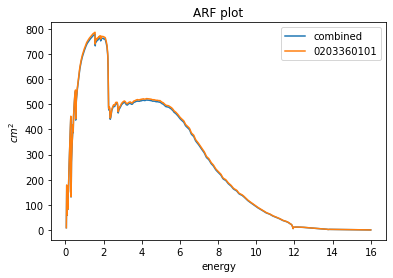

In [85]:
ax=df.plot(x='x',y=['combined','0203360101'])
ax.set(xlabel='energy', ylabel='$cm^2$',
       title='ARF plot')

# Issues with Line Unit

__VARIABLES__:<br>
$C_i$: Counts for each pointing<br>
$C$: Total Counts for all pointings<br>
$t_i$: Exposure Time for each pointing<br>
$t$: Total Exposure Time for all pointings<br>
$R_i$: Count Rate for each pointing<br>
$R$: Total Count Rate for all pointings<br>
$\Omega_i$: Solid Angle in sr for each pointing<br>
$n$: Number of pointings<br>
$LU_i$: Line Unit in $counts/cm^2/s/sr/keV$ for each pointing<br>

__ASSUMPTIONS__:
- RMFs and ARFs are the same for all pointings, so counts in channels can be converted to count/keV in the same manner.
- Redefine $LU_i$ as Line Unit in $counts/cm^2/s/sr$ for each pointing

## Multiple Pointings for a Single Field (CDFS)
The Total Count Rate can be defined as such:
\begin{equation*}
R = \frac{\sum_{i=1}^{n}C_i}{\sum_{i=1}^{n}t_i}
  = \sum_{i=1}^{n}\frac{C_i}{t_i}\times\frac{t_i}{t}
  = \sum_{i=1}^{n}R_i\times\frac{t_i}{t}
\end{equation*}
The Total Line Unit derived from Stacked Spectrum can be defined as:
\begin{equation*}
LU = \frac{\sum_{i=1}^{n}C_i}{\sum_{i=1}^{n}t_i\times\bar{\Omega}}
   = \frac{C}{t\times\bar{\Omega}}
\end{equation*}
The Total Line Unit should also be a weighted average of individual Line Unit from each pointing:
\begin{equation*}
LU = \sum_{i=1}^{n}LU_i \times w_i
\end{equation*}
If we define the weight $w_i$ as 
\begin{equation*}
w_i = \frac{t_i}{t}
\end{equation*}
And in an ideal situation where solid angle for each pointing is roguhly the same:
\begin{equation*}
\Omega_i \approx \bar{\Omega}
\end{equation*}
we have:
\begin{equation*}
LU = \sum_{i=1}^{n}LU_i \times w_i
   = \sum_{i=1}^{n}\frac{C_i}{t_i\Omega_i}\times\frac{t_i}{t}
   = \frac{1}{t}\times\sum_{i=1}^{n}\frac{C_i}{\Omega_i}
   \approx \frac{C}{t\times\bar{\Omega}}
\end{equation*}

## Multiple Pointings for an Extended Field (COSMOS)
If we define the weight $w_i$ as 
\begin{equation*}
w_i = \frac{t_i}{t}
\end{equation*}
We still have:
\begin{equation*}
LU = \sum_{i=1}^{n}LU_i \times w_i
   = \sum_{i=1}^{n}\frac{C_i}{t_i\Omega_i}\times\frac{t_i}{t}
   = \frac{1}{t}\times\sum_{i=1}^{n}\frac{C_i}{\Omega_i}
   \approx \frac{C}{t\times\bar{\Omega}}
\end{equation*}

# Compare results with individual pointings

In [169]:
em=0.002412268193438649
ind_result = '/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/result_2gas.txt'
nums = [line.strip() for line in open(ind_result) if line.startswith('0')]
norms = [float(line.split()[4]) for line in open(ind_result) if '4    1' in line]
norms = np.array(norms)
pnorms = [float(line.split()[4]) for line in open(ind_result) if '17    6' in line] 
#pnorms = [float(line.split()[4]) for line in open(ind_result) if '15    5' in line]
pnorms = np.array(pnorms)
solid_angles=norms / (em*2451)
pnorms_sr = pnorms / solid_angles
exps=[]
for num in nums:
    with fits.open(f'/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/{num}-pnS005-obj-os-full.pi') as hdu:
        exps.append(float(hdu[1].header['EXPOSURE']))
exps = np.array(exps)
w_i = exps/np.sum(exps)
pnorms_sr
#print(f'Powerlaw Norm for 0203360101 is {p} photons/keV/cm2/s/sr')

array([14.44706386, 17.95519212, 17.33688527, 10.69156913,  9.80273467,
       12.26037534, 17.98241774, 23.95091896, 16.42473272, 13.18239817,
       14.5471519 , 15.09663296, 15.5829219 , 17.99204263, 19.03781154,
       16.22148163, 21.86896922, 10.34735629, 16.18850237, 29.78485083,
        8.02693564, 31.68383646, 22.79070018, 17.66965374, 40.79889635,
       11.5518014 , 13.1004617 , 17.12342725, 15.69944195, 14.39432885,
       10.85231526, 15.09711374, 14.10446987, 11.50390418, 12.37239454,
       15.20480691, 17.87990101, 17.26527997, 15.23663814, 13.22103322,
       14.57358907, 10.3208172 , 16.45358649, 11.55642009, 16.7142412 ,
       16.06803139, 10.62416529, 16.49953817])

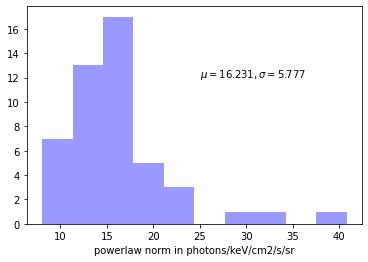

In [170]:
plt = sns.distplot(a=pnorms_sr,axlabel='powerlaw norm in photons/keV/cm2/s/sr',kde=False,color='blue',bins=10)
plt.text(25,12,f'$\mu={{{np.average(pnorms_sr):.3f}}}, \sigma={{{np.std(pnorms_sr):.3f}}}$');

In [171]:
#sr=0.00059
solid_angle = np.average(solid_angles)
pnorm=3.43666E-04
p=pnorm/solid_angle
print(f'Powerlaw Norm for whole COSMOS field is {p} photons/keV/cm2/s/sr')

Powerlaw Norm for whole COSMOS field is 11.408277111096726 photons/keV/cm2/s/sr


In [172]:
LU = np.sum(pnorms_sr * w_i)
LU

15.767718993721838

In [156]:
solid_angle

3.0124268253066822e-05

In [165]:
8.98152E-06/solid_angle

0.2981489848831641

In [167]:
1.10555E-06/solid_angle

0.03669964663415347

In [168]:
0.2981489848831641/0.03669964663415347

8.124028763963638